## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_toys.csv')
df.head()

,img_data,img_link,link,name,num_ratings,price,stars
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Nuby-Ice-Gel-Teether-Ke...,Nuby Ice Gel Teether Keys,3184.0,3.54,4.3 out of 5 stars
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/First-Years-Stack-Up-Cu...,The First Years Stack Up Cups,2811.0,3.99,4.8 out of 5 stars
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Baby-Banana-Training-To...,Baby Banana Infant Training Toothbrush and Tee...,7656.0,6.99,4.7 out of 5 stars
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Mega-Bloks-80-Piece-Bui...,"Mega Bloks 80-Piece Big Building Bag, Classic",5954.0,14.92,4.7 out of 5 stars
4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Baby-Einstein-Along-Tun...,Baby Einstein Take Along Tunes Musical Toy,10217.0,8.99,4.6 out of 5 stars


We first look at ratings, and numbers of raters. We convert rating column to numerics. And then plot histogram to look at its distribution.
Notice that the 'num_ratings' column is not on the proper scale, we log it.

Further, we are curious about the correlation between ratings and numbers of rating. So scatter plot is suitable. However, a number of items rated only few times, which makes the dataset bias towards high number of ratings, so we apply Laplace smoothing.

This Laplace smoothing is like Bayesian prespective: prior rating is each item rates median 2.5, and then add information of whole dataset to form posterior rating.

In [3]:
df["stars"] = df['stars'].apply(lambda x: float(x.split()[0]))
df["ratings"] = (df["stars"]-1)/4

In [4]:
df.shape

(6271, 8)

(array([ 164.,  165.,  813., 1666., 2277., 1186.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 25 Patch objects>)

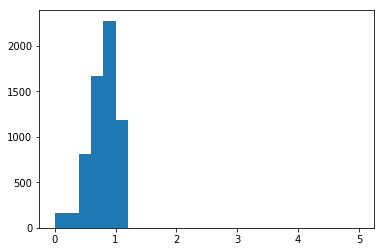

In [5]:
plt.hist(df['ratings'], range=[0,5], bins=25)

(array([872., 532., 350., 301., 446., 486., 452., 498., 465., 382., 338.,
        292., 214., 175., 147., 111.,  63.,  55.,  39.,  25.,  15.,   7.,
          1.,   3.,   2.]),
 array([0.        , 0.16217533, 0.32435066, 0.48652598, 0.64870131,
        0.81087664, 0.97305197, 1.1352273 , 1.29740263, 1.45957795,
        1.62175328, 1.78392861, 1.94610394, 2.10827927, 2.2704546 ,
        2.43262992, 2.59480525, 2.75698058, 2.91915591, 3.08133124,
        3.24350657, 3.40568189, 3.56785722, 3.73003255, 3.89220788,
        4.05438321]),
 <a list of 25 Patch objects>)

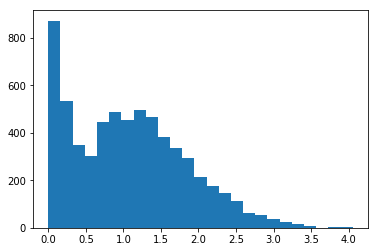

In [6]:
plt.hist(np.log10(df['num_ratings']), bins=25)

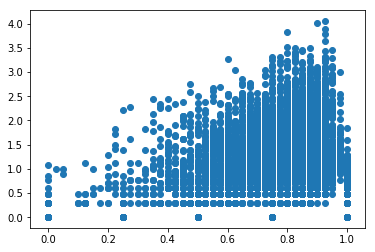

In [7]:
plt.scatter(df['ratings'], np.log10(df['num_ratings']))

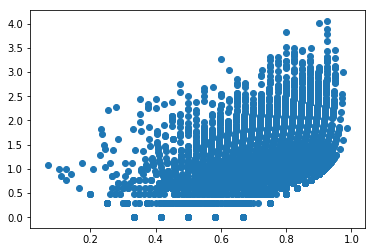

In [9]:
# Laplace smoothing
df['bayes_ratings'] = (df['ratings']*df['num_ratings'] + 1)/(df['num_ratings'] + 2)
plt.scatter(df['bayes_ratings'], np.log10(df['num_ratings']))

(array([  2.,   0.,  11.,   9.,  43., 112., 177., 279., 645., 770., 694.,
        965., 573., 595., 421., 297., 161., 127.,  96.,  72.,  79.,  57.,
         25.,  21.,   9.,  13.,   5.,   4.,   5.,   4.]),
 array([0.58221562, 0.76479711, 0.94737861, 1.1299601 , 1.3125416 ,
        1.49512309, 1.67770458, 1.86028608, 2.04286757, 2.22544906,
        2.40803056, 2.59061205, 2.77319355, 2.95577504, 3.13835653,
        3.32093803, 3.50351952, 3.68610101, 3.86868251, 4.051264  ,
        4.2338455 , 4.41642699, 4.59900848, 4.78158998, 4.96417147,
        5.14675297, 5.32933446, 5.51191595, 5.69449745, 5.87707894,
        6.05966043]),
 <a list of 30 Patch objects>)

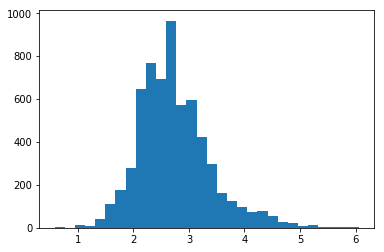

In [10]:
plt.hist(np.log(df['price']), bins=30)

The distribution of price after log transform looksquite normal.And there is no other correlations between price and other variables.

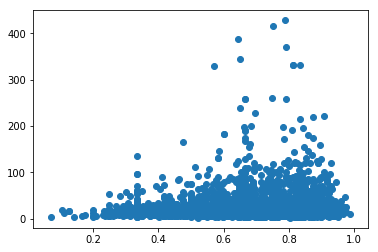

In [11]:
plt.scatter(df['bayes_ratings'], df['price'])


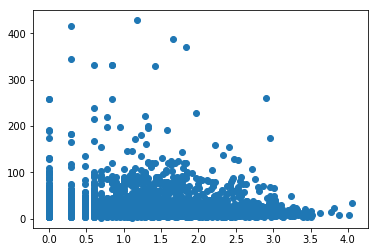

In [12]:
plt.scatter(np.log10(df['num_ratings']), df['price'])



Now lets drop na terms

In [13]:
df.dropna(subset=["price"], inplace=True)

In [14]:
df.columns

Index(['img_data', 'img_link', 'link', 'name', 'num_ratings', 'price', 'stars',
       'ratings', 'bayes_ratings'],
      dtype='object')

In [15]:
# for further purpose, sort the dataset
df.sort_values(by=["bayes_ratings"], ascending=False, inplace=True)

In [16]:
df = df[df["num_ratings"]>4].copy()

In [17]:
df.shape

(4216, 9)

(array([  2.,   4.,   1.,   1.,   7.,   9.,   6.,  15.,  26.,  36.,  54.,
         83., 143., 166., 208., 247., 289., 335., 414., 483., 475., 555.,
        380., 253.,  24.]),
 array([0.07142857, 0.10801587, 0.14460317, 0.18119048, 0.21777778,
        0.25436508, 0.29095238, 0.32753968, 0.36412698, 0.40071429,
        0.43730159, 0.47388889, 0.51047619, 0.54706349, 0.58365079,
        0.6202381 , 0.6568254 , 0.6934127 , 0.73      , 0.7665873 ,
        0.8031746 , 0.8397619 , 0.87634921, 0.91293651, 0.94952381,
        0.98611111]),
 <a list of 25 Patch objects>)

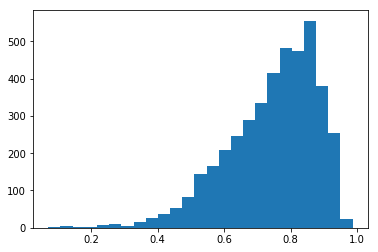

In [18]:
plt.hist(df["bayes_ratings"], bins=25)

Notice this variable is target, so transform that to normal to fit assumptions.Here we use logit transformation.

((array([-3.59149188, -3.35345954, -3.22212794, ...,  3.22212794,
          3.35345954,  3.59149188]),
  array([-4.97461787, -4.73303713, -4.68179272, ...,  1.68591538,
          1.69751027,  1.7750018 ])),
 (0.9726382502342947, 3.484394173651809e-14, 0.971882356104486))

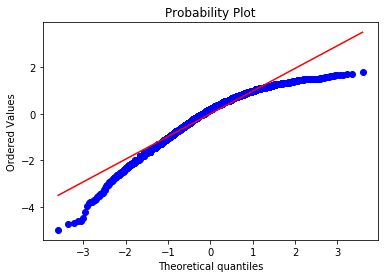

In [19]:
import scipy.stats as stats
stats.probplot((df["bayes_ratings"] - np.mean(df["bayes_ratings"]))/np.std(df["bayes_ratings"]),plot=plt)

In [20]:
df["logit_rating"] = np.log(df["bayes_ratings"]/(1-df["bayes_ratings"]))

(array([  1.,   2.,   3.,   1.,   2.,  12.,  14.,  42.,  84., 188., 333.,
        432., 505., 578., 611., 485., 351., 295., 169.,  67.,  30.,   5.,
          5.,   0.,   1.]),
 array([-2.56494936, -2.29184419, -2.01873902, -1.74563385, -1.47252868,
        -1.19942351, -0.92631834, -0.65321317, -0.380108  , -0.10700283,
         0.16610234,  0.43920751,  0.71231268,  0.98541784,  1.25852301,
         1.53162818,  1.80473335,  2.07783852,  2.35094369,  2.62404886,
         2.89715403,  3.1702592 ,  3.44336437,  3.71646954,  3.98957471,
         4.26267988]),
 <a list of 25 Patch objects>)

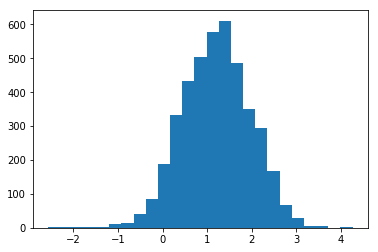

In [21]:
plt.hist(df["logit_rating"], bins=25)

((array([-3.59149188, -3.35345954, -3.22212794, ...,  3.22212794,
          3.35345954,  3.59149188]),
  array([-4.93063575, -4.39002401, -4.29540006, ...,  3.16804274,
          3.25183861,  4.00259585])),
 (0.9991770573440354, -1.2296166189413617e-14, 0.9984005383534346))

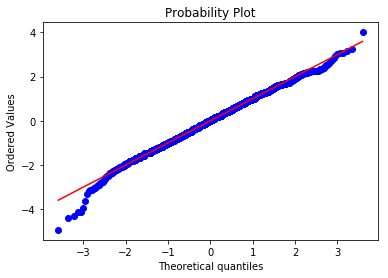

In [22]:
stats.probplot((df["logit_rating"] - np.mean(df["logit_rating"]))/np.std(df["logit_rating"]),plot=plt)

## text for logistic regression

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =  TfidfVectorizer(min_df=10, max_df=0.3, ngram_range=(1,3))


X_tfidf = tfidf.fit_transform(df["name"]).toarray()
X = np.hstack([X_tfidf, np.log(df[["price"]]).values])
y = df['logit_rating'] > np.median(df['logit_rating'])

In [26]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))


0.7753026634382567
0.6106094808126411


In [30]:
def get_error(clf, X, y, X_cv, y_cv, n):
    clf.fit(X[:n], y[:n])
    return np.array([clf.score(X[:n], y[:n]), clf.score(X_cv, y_cv)])


n_samples = [int(x) for x in np.linspace(20, X_train.shape[0], 10)]
errors =  np.array([get_error(clf, X_train, y_train, X_cv, y_cv, n) for n in n_samples])


G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda_3\lib\site-pa

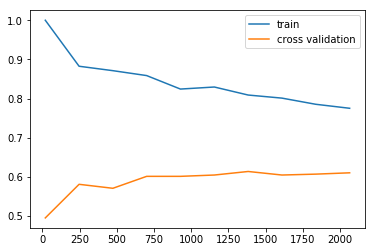

In [32]:
plt.plot(n_samples, errors[:,0], n_samples, errors[:,1])
plt.legend(['train', 'cross validation'])

It seems that large data set would make improvement. 

In [34]:
clf = LogisticRegression(C=1.0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_cv, y_cv))
print(clf.score(X_test, y_test))

0.7753026634382567
0.6106094808126411
0.6110671936758894


G:\anaconda_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


the most effective words in toys'titles

In [35]:
feature_names = np.array(tfidf.get_feature_names() + ["++price++"])

sorted(zip(feature_names, clf.coef_[0]), key=lambda x : np.abs(x[1]), reverse=True)[:20]

[('green toys', 1.5803119718069618),
 ('roll', -1.3944456846067044),
 ('baby rattle', 1.298615692958738),
 ('celebriducks', 1.2927818047402746),
 ('brio', 1.1992263312490188),
 ('10', 1.1743101001357865),
 ('jr', -1.1715380950249676),
 ('haba', -1.1700138493777616),
 ('go', 1.133096984760798),
 ('toy for', 1.0774046529873846),
 ('janod', -1.0770826133691516),
 ('by', -1.0687789539574242),
 ('silicone', 1.0357622917459766),
 ('mat', -1.0264343212200704),
 ('wrist', -1.023024192084453),
 ('free', 1.0177012975614987),
 ('vtech', 1.0176116119612377),
 ('boys', 0.998867089232869),
 ('toddlers', 0.9714216869348535),
 ('squishy', -0.9521474187195631)]